Նախ ներմուծենք անհրաժեշտ գրադարանները։

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [102]:
from google.colab import drive
drive.mount('/content/drive')
base_path = "/content/drive/MyDrive/ML Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ներմուծենք նաև տվյալնրի բազմությունները։ Ունենք 3 տարիների տվյալներ, որոնք ներբեռնում ենք տարի֊տարի, սակայն հետագա վերլուծության համար կազմելու ենք մեկ ամբողջական data set։

In [103]:
f1_2023drivers = pd.read_csv(base_path + "Formula1_2023season_drivers.csv")
f1_2023results = pd.read_csv(base_path + "Formula1_2023season_raceResults.csv")
f1_2023qualifying = pd.read_csv(base_path + "Formula1_2023season_qualifyingResults.csv")

In [104]:
f1_2023drivers

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
1,Sergio Perez,PER,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
2,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1,07/01/1985,"Stevenage, England"
3,Fernando Alonso,ALO,14,Aston Martin,Spain,106,2267.0,380,2,1(x32),1,29/07/1981,"Oviedo, Spain"
4,Charles Leclerc,LEC,16,Ferrari,Monaco,30,1074.0,125,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
5,Lando Norris,NOR,4,McLaren,United Kingdom,13,633.0,104,0,2(x7),1,13/11/1999,"Bristol, England"
6,Carlos Sainz,SAI,55,Ferrari,Sapin,18,982.5,185,0,1(x2),1,01/09/1994,"Madrid, Spain"
7,George Russell,RUS,63,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1,15/02/1998,"King's Lynn, England"
8,Oscar Piastri,PIA,81,McLaren,Australia,2,97.0,22,0,2(x1),2,06/04/2001,"Melbourne, Victoria"
9,Lance Stroll,STR,18,Aston Martin,Canada,3,268.0,143,0,3(x3),1,29/10/1998,"Montreal, Canada"


In [105]:
f1_2023results

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546
...,...,...,...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,2,Logan Sargeant,Williams Mercedes,20,58,+87.791,0,No,1:28.580
436,Abu Dhabi,17,24,Guanyu Zhou,Alfa Romeo Ferrari,19,58,+89.422,0,No,1:28.746
437,Abu Dhabi,18,55,Carlos Sainz,Ferrari,16,57,DNF,0,No,1:29.452
438,Abu Dhabi,19,77,Valtteri Bottas,Alfa Romeo Ferrari,18,57,+1 lap,0,No,1:29.863


In [106]:
f1_2023qualifying

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.295,1:30.503,1:29.708,15
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,1:31.479,1:30.746,1:29.846,15
2,Bahrain,3,16,Charles Leclerc,Ferrari,1:31.094,1:30.282,1:30.000,17
3,Bahrain,4,55,Carlos Sainz,Ferrari,1:30.993,1:30.515,1:30.154,18
4,Bahrain,5,14,Fernando Alonso,Aston Martin Aramco Mercedes,1:31.158,1:30.645,1:30.336,15
...,...,...,...,...,...,...,...,...,...
435,Abu Dhabi,16,55,Carlos Sainz,Ferrari,1:24.738,NaN,NaN,6
436,Abu Dhabi,17,20,Kevin Magnussen,Haas Ferrari,1:24.764,NaN,NaN,6
437,Abu Dhabi,18,77,Valtteri Bottas,Alfa Romeo Ferrari,1:24.788,NaN,NaN,6
438,Abu Dhabi,19,24,Guanyu Zhou,Alfa Romeo Ferrari,1:25.159,NaN,NaN,6


In [107]:
f1_2024drivers = pd.read_csv(base_path + "Formula1_2024season_drivers.csv")
f1_2024results = pd.read_csv(base_path + "Formula1_2024season_raceResults.csv")
f1_2024qualifying = pd.read_csv(base_path + "Formula1_2024season_qualifyingResults.csv")

In [108]:
f1_2025results = pd.read_csv(base_path + "Formula1_2025Season_RaceResults.csv")
f1_2025qualifying = pd.read_csv(base_path + "Formula1_2025Season_QualifyingResults.csv")

Ավելացնենք Year սյունակ, որպեսզի հետագայում ըստ դրա տվյալների բազմությունները միացնենք միմյանց։

In [109]:
f1_2023results['Year'] = 2023
f1_2024results['Year'] = 2024
f1_2025results['Year'] = 2025

f1_2023qualifying['Year'] = 2023
f1_2024qualifying['Year'] = 2024
f1_2025qualifying['Year'] = 2025

f1_2023drivers['Year'] = 2023
f1_2024drivers['Year'] = 2024

In [110]:
results = pd.concat([f1_2023results, f1_2024results, f1_2025results], ignore_index=True)
qualifying = pd.concat([f1_2023qualifying, f1_2024qualifying, f1_2025qualifying], ignore_index=True)
drivers_combined = pd.concat([f1_2023drivers, f1_2024drivers], ignore_index=True)

In [111]:
results

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236,2023
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344,2023
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156,2023
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130,2023
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,Monaco,16,27,Nico Hulkenberg,Kick Sauber Ferrari,13,76,+2 laps,0,No,1:15.223,2025
1075,Monaco,17,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,12,76,+2 laps,0,No,1:14.913,2025
1076,Monaco,18,12,Kimi Antonelli,Mercedes,15,75,+3 laps,0,No,1:13.518,2025
1077,Monaco,NC,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,36,DNF,0,No,1:15.593,2025


In [112]:
qualifying

,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps,Year
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.295,1:30.503,1:29.708,15,2023
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,1:31.479,1:30.746,1:29.846,15,2023
2,Bahrain,3,16,Charles Leclerc,Ferrari,1:31.094,1:30.282,1:30.000,17,2023
3,Bahrain,4,55,Carlos Sainz,Ferrari,1:30.993,1:30.515,1:30.154,18,2023
4,Bahrain,5,14,Fernando Alonso,Aston Martin Aramco Mercedes,1:31.158,1:30.645,1:30.336,15,2023
...,...,...,...,...,...,...,...,...,...,...
1073,Monaco,16,5,Gabriel Bortoleto,Kick Sauber Ferrari,1:11.902,NaN,NaN,13,2025
1074,Monaco,17,87,Oliver Bearman,Haas Ferrari,1:11.979,NaN,NaN,13,2025
1075,Monaco,18,10,Pierre Gasly,Alpine Renault,1:11.994,NaN,NaN,11,2025
1076,Monaco,19,18,Lance Stroll,Aston Martin Aramco Mercedes,1:12.563,NaN,NaN,11,2025


In [113]:
drivers_summary = drivers_combined[['Driver', 'Points', 'Podiums', 'Year']]

Այստեղ կատարում ենք միացումը և արդեն իսկ մեծամասամբ թողնում ենք այն տվյալները, որոնց հետ աշխատելու ենք։

In [114]:
df = pd.merge(
    results,
    qualifying[['Track', 'No', 'Year', 'Q1', 'Q2', 'Q3']],
    on=['Track', 'No', 'Year'],
    how='left',
    suffixes=('', '_qual')
)

df = pd.merge(
    df,
    drivers_summary,
    on=['Driver', 'Year'],
    how='left',
    suffixes=('', '_career')
)

df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year,Q1,Q2,Q3,Points_career,Podiums
0,Bahrain,1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,1:36.236,2023,1:31.295,1:30.503,1:29.708,2586.5,98.0
1,Bahrain,2,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,1:36.344,2023,1:31.479,1:30.746,1:29.846,1486.0,35.0
2,Bahrain,3,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,1:36.156,2023,1:31.158,1:30.645,1:30.336,2267.0,106.0
3,Bahrain,4,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,1:37.130,2023,1:30.993,1:30.515,1:30.154,982.5,18.0
4,Bahrain,5,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,1:36.546,2023,1:31.543,1:30.513,1:30.384,4639.5,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,Monaco,16,27,Nico Hulkenberg,Kick Sauber Ferrari,13,76,+2 laps,0,No,1:15.223,2025,1:11.871,1:11.596,NaN,NaN,NaN
1075,Monaco,17,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,12,76,+2 laps,0,No,1:14.913,2025,1:11.800,1:11.415,NaN,NaN,NaN
1076,Monaco,18,12,Kimi Antonelli,Mercedes,15,75,+3 laps,0,No,1:13.518,2025,1:11.880,NaN,NaN,NaN,NaN
1077,Monaco,NC,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,36,DNF,0,No,1:15.593,2025,1:11.674,1:11.182,1:10.924,NaN,NaN


Տեսնենք data set-ի սյուների և տողերի քանակը։

In [115]:
df.shape

(1079, 17)

Ինչպես նաև ամեն սյան անունը և տիպը։

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             1079 non-null   object 
 1   Position          1079 non-null   object 
 2   No                1079 non-null   int64  
 3   Driver            1079 non-null   object 
 4   Team              1079 non-null   object 
 5   Starting Grid     1079 non-null   int64  
 6   Laps              1079 non-null   int64  
 7   Time/Retired      1079 non-null   object 
 8   Points            1079 non-null   int64  
 9   Set Fastest Lap   1079 non-null   object 
 10  Fastest Lap Time  1044 non-null   object 
 11  Year              1079 non-null   int64  
 12  Q1                1076 non-null   object 
 13  Q2                804 non-null    object 
 14  Q3                538 non-null    object 
 15  Points_career     919 non-null    float64
 16  Podiums           919 non-null    float64


Այստեղ իմաստ չկա նայելու No, Starting Grid, Laps, Year սյան համար հաշված արժեքներին։

In [117]:
df[['Points_career', 'Podiums', 'Points']].describe()

,Points_career,Podiums,Points
count,919.000000,919.000000,1079.000000
mean,1010.257345,32.247008,5.090825
std,1164.460289,50.303273,7.230700
min,0.000000,0.000000,0.000000
25%,228.000000,1.000000,0.000000
50%,530.000000,10.000000,1.000000
75%,1458.000000,39.000000,9.500000
max,4862.500000,202.000000,26.000000


In [118]:
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,No,Starting Grid,Laps,Points,Year,Points_career,Podiums
No,1.000000,-0.050335,0.038838,-0.030941,0.004750,0.036496,0.050544
Starting Grid,-0.050335,1.000000,-0.117452,-0.678859,-0.000567,-0.352724,-0.306132
Laps,0.038838,-0.117452,1.000000,0.211728,-0.039980,0.071785,0.069728
Points,-0.030941,-0.678859,0.211728,1.000000,-0.001572,0.418370,0.371715
Year,0.004750,-0.000567,-0.039980,-0.001572,1.000000,0.067991,0.042662
Points_career,0.036496,-0.352724,0.071785,0.418370,0.067991,1.000000,0.982278
Podiums,0.050544,-0.306132,0.069728,0.371715,0.042662,0.982278,1.000000


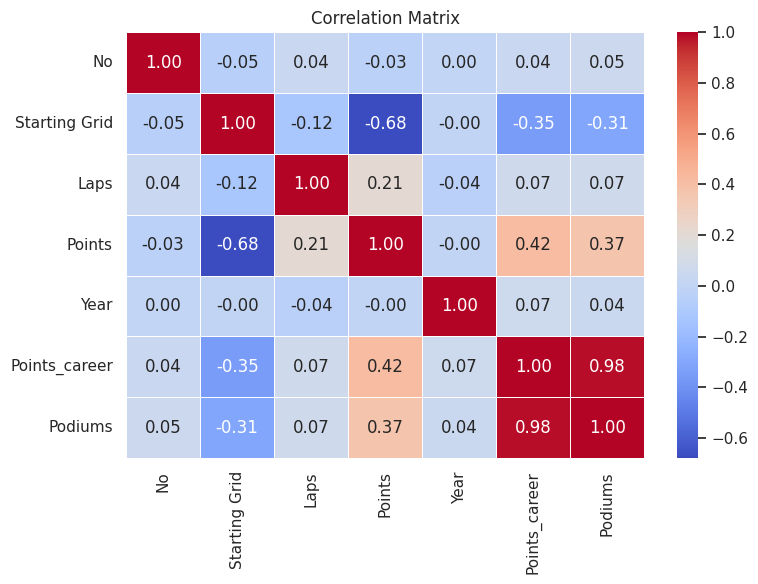

In [119]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Ներքևում կարող ենք տեսնել բացակայող տվյալների քանակը ամեն սյան համար, որի հետ մենք հետագայում կաշխատենք, որպեսզի լրացնենք։

In [120]:
df.isna().sum()

,0
Track,0
Position,0
No,0
Driver,0
Team,0
Starting Grid,0
Laps,0
Time/Retired,0
Points,0
Set Fastest Lap,0


In [121]:
def time_to_seconds(t):
    if pd.isna(t) or t in ['DNF', 'No Time', '']:
        return np.nan
    try:
        parts = t.split(':')
        if len(parts) == 2:
            m, s = parts
            return int(m) * 60 + float(s)
        elif len(parts) == 3:
            h, m, s = parts
            return int(h) * 3600 + int(m) * 60 + float(s)
        else:
            return float(t)
    except:
        return np.nan

In [122]:
# Position փոփոխականի ոչ թվային տվյալները փոխարինենք Nan֊երով
df['Position'] = pd.to_numeric(df['Position'], errors='coerce')

# Ստեղծենք նոր սյուն, որը ընդունում է 1 արժեք, եթե վարորդը զբաղեցրել է 1֊ին տեղը (հաղթել է), 0՝ այլ դեպքում
df['Winner'] = np.where(df['Position'] == 1, 1, 0)

# Վերևում գրված ֆունկցիայի միջոցով փոխարինենք 1:22.56 տեսքով տրված ժամանակը վայրկյանների
for col in ['Q1', 'Q2', 'Q3', 'Fastest Lap Time']:
    df[col] = df[col].apply(time_to_seconds)
df

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time,Year,Q1,Q2,Q3,Points_career,Podiums,Winner
0,Bahrain,1.0,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,1:33:56.736,25,No,96.236,2023,91.295,90.503,89.708,2586.5,98.0,1
1,Bahrain,2.0,11,Sergio Perez,Red Bull Racing Honda RBPT,2,57,+11.987,18,No,96.344,2023,91.479,90.746,89.846,1486.0,35.0,0
2,Bahrain,3.0,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,57,+38.637,15,No,96.156,2023,91.158,90.645,90.336,2267.0,106.0,0
3,Bahrain,4.0,55,Carlos Sainz,Ferrari,4,57,+48.052,12,No,97.130,2023,90.993,90.515,90.154,982.5,18.0,0
4,Bahrain,5.0,44,Lewis Hamilton,Mercedes,7,57,+50.977,10,No,96.546,2023,91.543,90.513,90.384,4639.5,197.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,Monaco,16.0,27,Nico Hulkenberg,Kick Sauber Ferrari,13,76,+2 laps,0,No,75.223,2025,71.871,71.596,NaN,NaN,NaN,0
1075,Monaco,17.0,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,12,76,+2 laps,0,No,74.913,2025,71.800,71.415,NaN,NaN,NaN,0
1076,Monaco,18.0,12,Kimi Antonelli,Mercedes,15,75,+3 laps,0,No,73.518,2025,71.880,NaN,NaN,NaN,NaN,0
1077,Monaco,NaN,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,36,DNF,0,No,75.593,2025,71.674,71.182,70.924,NaN,NaN,0


In [123]:
# Բացակայող տվյալները լրացնենք max արժեքով (արդեն իսկ ցուցաբերած վատագույն արժեքով)
max_q_time = max(df['Q1'].max(), df['Q2'].max(), df['Q3'].max())

df['Q1'] = df['Q1'].fillna(max_q_time + 10)
df['Q2'] = df['Q2'].fillna(max_q_time + 10)
df['Q3'] = df['Q3'].fillna(max_q_time + 10)


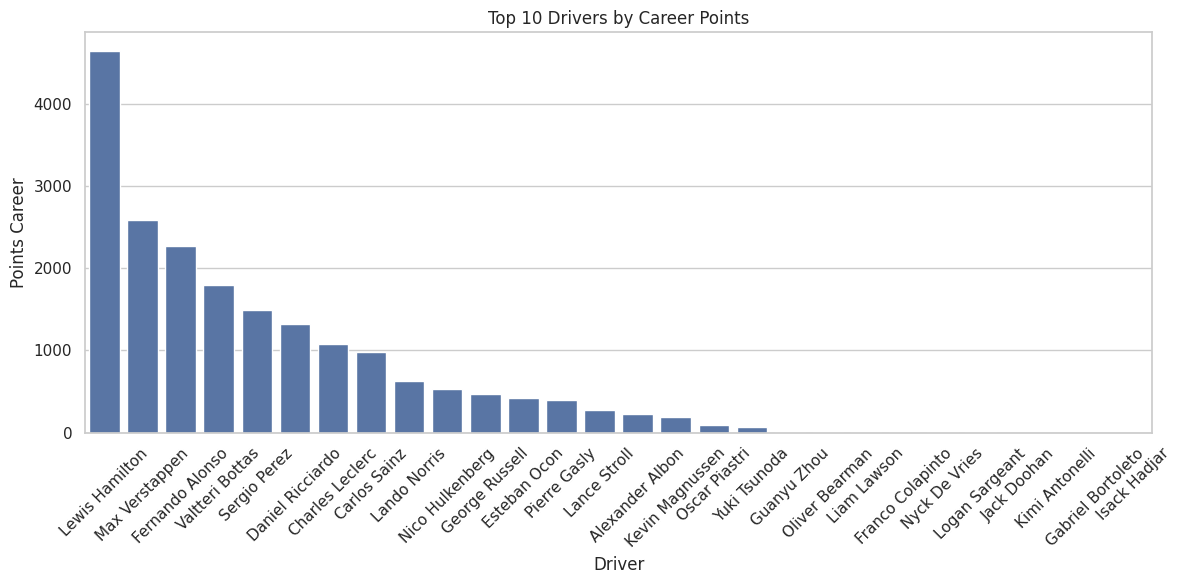

In [124]:
top_drivers = df.groupby("Driver")[["Points_career", 'Driver']].head(10)
top_drivers = top_drivers.sort_values('Points_career', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_drivers, x='Driver', y='Points_career')

plt.title("Top 10 Drivers by Career Points")
plt.ylabel("Points Career")
plt.xlabel("Driver")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

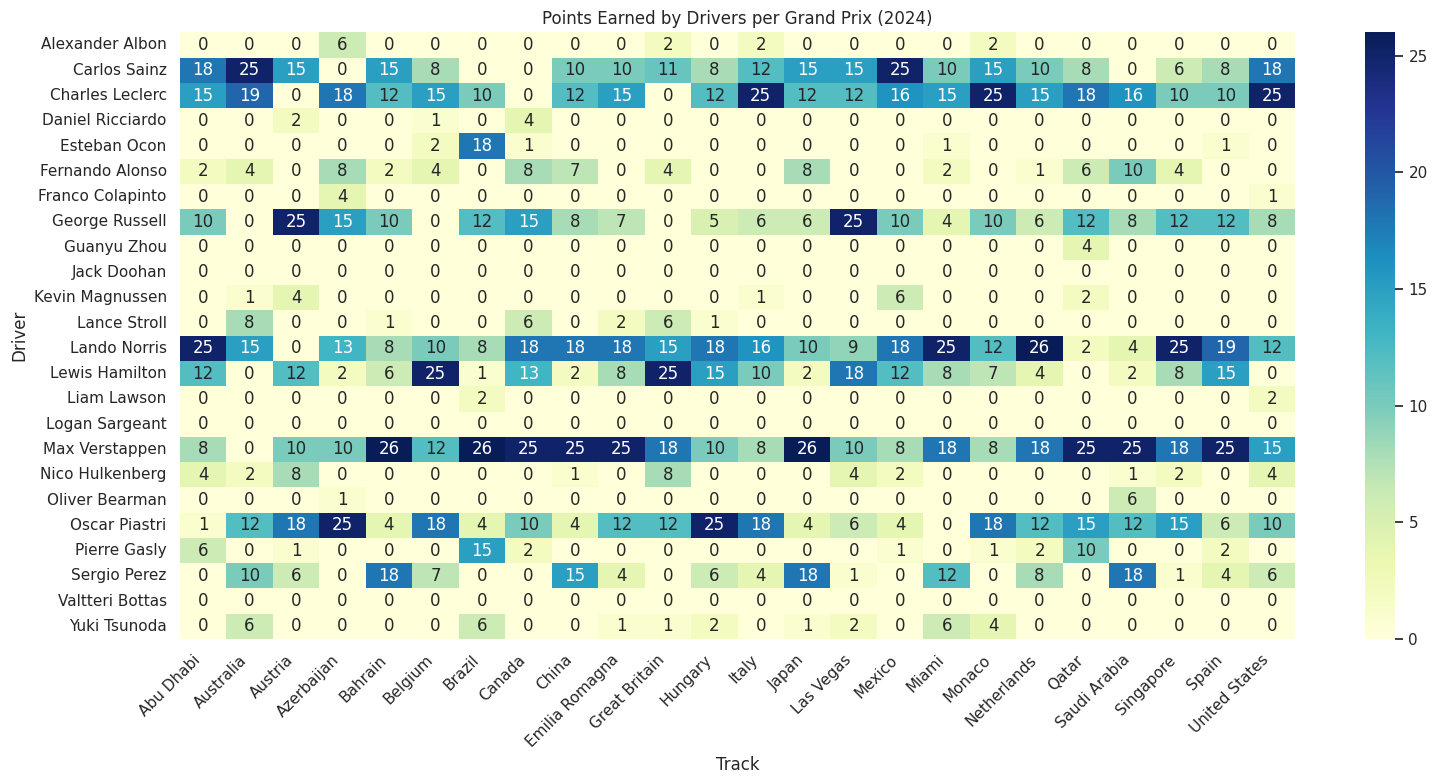

In [156]:
df_2024 = df[df['Year'] == 2024]

driver_gp_points = df_2024.pivot_table(
    index='Driver',
    columns='Track',
    values='Points',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(16, 8))
sns.heatmap(driver_gp_points, annot=True, fmt=".0f", cmap='YlGnBu')

plt.title("Points Earned by Drivers per Grand Prix (2024)")
plt.ylabel("Driver")
plt.xlabel("Track")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ավելացնենք նոր սյուն, որը ընդունում է 1 արժեք, եթե վարորդը հայտնվել է առաջին 10֊յակում, 0՝ հակառակ դեպքում։

In [126]:
df['Top10'] = df['Position'].apply(lambda x: 1 if pd.notna(x) and x <= 10 else 0)

In [143]:
# Ընտրենք մեր մոդելի համար անհրաժեշտ սյուները
features = ['Starting Grid', 'Q1', 'Q2', 'Q3', 'Points_career', 'No']

df_model = df[features + ['Top10']].dropna()

# Անկախ փոփոխականներ
X = df_model[features]

# Կանխատեսվող փոփոխական
y = df_model['Top10']

# Տվյալները բաժանենք test/train տվյալների
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [128]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

**Մոդելի ընտրությունը։** Լոգիստիկ Ռեգրեսիա

Ցանկանում ենք կանխատեսել նոր մրցացարշավի առաջին տասնյակում ավարտած վարորդներին։ Դրա համար ստեղծել էինք Top10 սյունակը, որը ուներ 0 և 1 արժեքները։ Դա մեր կախյալ փոփոխականն է։

Օգտագործում ենք ['Starting Grid', 'Q1', 'Q2', 'Q3', 'Points_career',	'Podiums', 'No'] սյունակները, որպեսզի անենք կանխատեսում։

Ընտրվել է Լոգիստիկ Ռեգրեսիա, քանի որ մեզ հետաքրքրում է տվյալ վարորդի հաղթելու հավանականությունը առաջին տասնյակում գտնվելու հավանականությունը:

In [144]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 0.8040816326530612


Կարող ենք տեսնել ուսուցման արդյունքում ստացված գործակիցները։

In [145]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients = ", coefficients)
print("Intercept = ", intercept)

Coefficients =  [-1.73045065e-01  5.63536909e-05 -5.00474048e-05 -1.16967675e-04
  5.15394451e-04 -2.04158681e-03]
Intercept =  1.9060168306154919


Կատարենք կանխատեսում test data-ի համար և հաշվենք accuracy, precision, recall:

In [146]:
y_pred = model.predict(X_test)
print("Test Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

Test Accuracy =  0.7771739130434783
Precision =  0.8
Recall =  0.7391304347826086
Confusion Matrix
 [[75 17]
 [24 68]]


Ամբողջովին նոր կանխատեսում train/test data-ից դուրս տվյալի համար։

In [147]:
spanish_2025_data = pd.read_csv(base_path + "spanish_gp_2025.csv")
spanish_2025_data

,Pos,No,Driver,Car,Q1,Q2,Q3,Laps
0,1,81,Oscar Piastri,McLaren Mercedes,1:12.551,1:11.998,1:11.546,14
1,2,4,Lando Norris,McLaren Mercedes,1:12.799,1:12.056,1:11.755,15
2,3,1,Max Verstappen,Red Bull Racing Honda RBPT,1:12.798,1:12.358,1:11.848,12
3,4,63,George Russell,Mercedes,1:12.806,1:12.407,1:11.848,12
4,5,44,Lewis Hamilton,Ferrari,1:13.058,1:12.447,1:12.045,15
5,6,12,Kimi Antonelli,Mercedes,1:12.815,1:12.585,1:12.111,18
6,7,16,Charles Leclerc,Ferrari,1:13.014,1:12.495,1:12.131,12
7,8,10,Pierre Gasly,Alpine Renault,1:13.081,1:12.611,1:12.199,18
8,9,6,Isack Hadjar,Racing Bulls Honda RBPT,1:13.139,1:12.461,1:12.252,15
9,10,14,Fernando Alonso,Aston Martin Aramco Mercedes,1:13.102,1:12.523,1:12.284,14


In [148]:
for col in ['Q1', 'Q2', 'Q3']:
    spanish_2025_data[col] = spanish_2025_data[col].apply(time_to_seconds)
max_q_time = max(spanish_2025_data['Q1'].max(), spanish_2025_data['Q2'].max(), spanish_2025_data['Q3'].max())

spanish_2025_data['Q1'] = spanish_2025_data['Q1'].fillna(max_q_time + 10)
spanish_2025_data['Q2'] = spanish_2025_data['Q2'].fillna(max_q_time + 10)
spanish_2025_data['Q3'] = spanish_2025_data['Q3'].fillna(max_q_time + 10)

In [149]:
spanish_2025_data.rename(columns={'Pos': 'Starting Grid'}, inplace=True)
spanish_2025_data = pd.merge(
    spanish_2025_data,
    f1_2024drivers[['No', 'Points', 'Podiums']],
    on='No',
    how='left'
)
spanish_2025_data.rename(columns={'Points': 'Points_career'}, inplace=True)
spanish_2025_data[['Points_career', 'Podiums']] = spanish_2025_data[['Points_career', 'Podiums']].fillna(0)
spanish_2025_data

,Starting Grid,No,Driver,Car,Q1,Q2,Q3,Laps,Points_career,Podiums
0,1,81,Oscar Piastri,McLaren Mercedes,72.551,71.998,71.546,14,389.0,10.0
1,2,4,Lando Norris,McLaren Mercedes,72.799,72.056,71.755,15,1007.0,26.0
2,3,1,Max Verstappen,Red Bull Racing Honda RBPT,72.798,72.358,71.848,12,3023.5,112.0
3,4,63,George Russell,Mercedes,72.806,72.407,71.848,12,714.0,15.0
4,5,44,Lewis Hamilton,Ferrari,73.058,72.447,72.045,15,4862.5,202.0
5,6,12,Kimi Antonelli,Mercedes,72.815,72.585,72.111,18,0.0,0.0
6,7,16,Charles Leclerc,Ferrari,73.014,72.495,72.131,12,1430.0,43.0
7,8,10,Pierre Gasly,Alpine Renault,73.081,72.611,72.199,18,436.0,5.0
8,9,6,Isack Hadjar,Racing Bulls Honda RBPT,73.139,72.461,72.252,15,0.0,0.0
9,10,14,Fernando Alonso,Aston Martin Aramco Mercedes,73.102,72.523,72.284,14,2337.0,106.0


In [150]:
X_spanish_2025 = spanish_2025_data[features]
predictions = model.predict(X_spanish_2025)

In [151]:
spanish_2025_data['Top10_Prediction'] = predictions
spanish_2025_data

,Starting Grid,No,Driver,Car,Q1,Q2,Q3,Laps,Points_career,Podiums,Top10_Prediction
0,1,81,Oscar Piastri,McLaren Mercedes,72.551,71.998,71.546,14,389.0,10.0,1
1,2,4,Lando Norris,McLaren Mercedes,72.799,72.056,71.755,15,1007.0,26.0,1
2,3,1,Max Verstappen,Red Bull Racing Honda RBPT,72.798,72.358,71.848,12,3023.5,112.0,1
3,4,63,George Russell,Mercedes,72.806,72.407,71.848,12,714.0,15.0,1
4,5,44,Lewis Hamilton,Ferrari,73.058,72.447,72.045,15,4862.5,202.0,1
5,6,12,Kimi Antonelli,Mercedes,72.815,72.585,72.111,18,0.0,0.0,1
6,7,16,Charles Leclerc,Ferrari,73.014,72.495,72.131,12,1430.0,43.0,1
7,8,10,Pierre Gasly,Alpine Renault,73.081,72.611,72.199,18,436.0,5.0,1
8,9,6,Isack Hadjar,Racing Bulls Honda RBPT,73.139,72.461,72.252,15,0.0,0.0,1
9,10,14,Fernando Alonso,Aston Martin Aramco Mercedes,73.102,72.523,72.284,14,2337.0,106.0,1


In [152]:
proba = model.predict_proba(X_spanish_2025)
spanish_2025_data['Top10_Prob'] = proba[:, 1]

In [153]:
final_table = spanish_2025_data.sort_values('Top10_Prob', ascending=False)
print(final_table[['No', 'Driver', 'Top10_Prob']].head(10).to_string(index=False))

 No          Driver  Top10_Prob
 44  Lewis Hamilton    0.969205
  1  Max Verstappen    0.949560
  4    Lando Norris    0.887241
 81   Oscar Piastri    0.853236
 63  George Russell    0.809271
 16 Charles Leclerc    0.800768
 14 Fernando Alonso    0.793064
 12  Kimi Antonelli    0.697471
 10    Pierre Gasly    0.672165
  6    Isack Hadjar    0.581371


In [154]:
actual_top_10 = pd.read_csv(base_path + "spanish_gp_2025_actual_top10.csv")
print(actual_top_10[['NO', 'DRIVER']].to_string(index=False))

 NO          DRIVER
 81   Oscar Piastri
  4    Lando Norris
 16 Charles Leclerc
 63  George Russell
 27 Nico Hulkenberg
 44  Lewis Hamilton
  6    Isack Hadjar
 10    Pierre Gasly
 14 Fernando Alonso
  1  Max Verstappen


In [157]:
No = sorted(spanish_2025_data['No'])

pred_top10_nos = final_table.head(10)['No'].tolist()
actual_top10_nos = actual_top_10['NO'].tolist()

y_pred = [1 if no in pred_top10_nos else 0 for no in No]
y_true = [1 if no in actual_top10_nos else 0 for no in No]

print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision = ", precision_score(y_true, y_pred))
print("Recall = ", recall_score(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix\n", cm)

Accuracy =  0.9
Precision =  0.9
Recall =  0.9
Confusion Matrix
 [[9 1]
 [1 9]]
